# The Iris Dataset
This is a very popular dataset used for teaching classification problems. This is one of the toy datasets provided with scikit-learn. In this notebooks we learn how to explore basic classification features.

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [7]:
X = iris.data
y = iris.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [9]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [11]:
clf.score(X_test, y_test)

0.9565217391304348

Not a bad accuracy for using a simple desicion tree without any fine tuning. Now we will try to visualize he decision process using pydot and graphviz.

In [12]:
import graphviz 

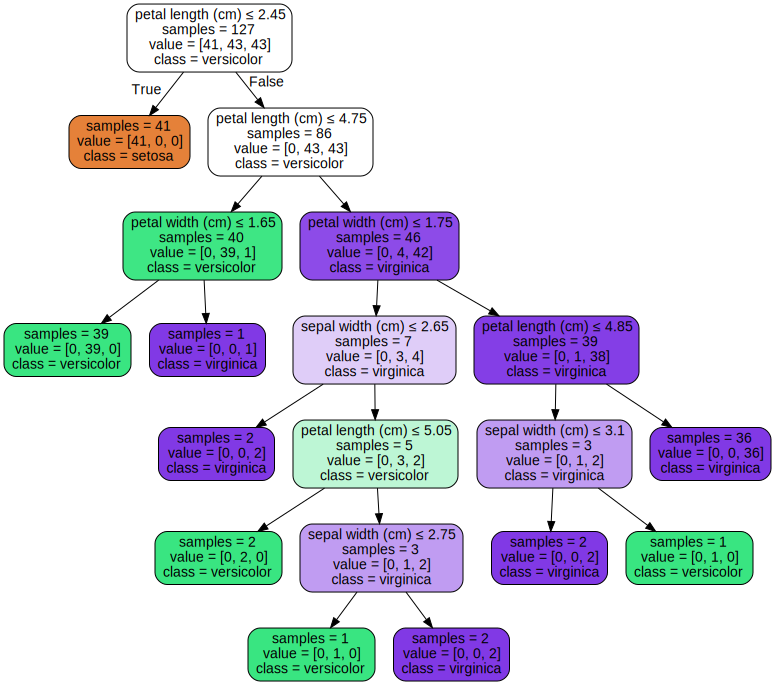

In [13]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True, impurity=False)
graph = graphviz.Source(dot_data) 
graph

## Cluster Analysis with Iris Dataset

In [14]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
X = scale(iris.data)
y = pd.DataFrame(iris.target)
variables = iris.feature_names
variables

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Plotting the cluster

In [16]:
K_means_cluster = KMeans(n_clusters=3, random_state=42)

K_means_cluster.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [17]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']
iris_df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Comparing with normal classification

Text(0.5,1,'Classification with default labels')

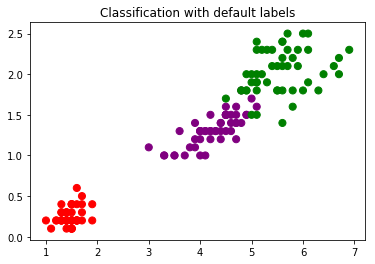

In [18]:
color_theme = np.array(['red', 'purple', 'green'])
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Classification with default labels')

Text(0.5,1,'K-Means Classification')

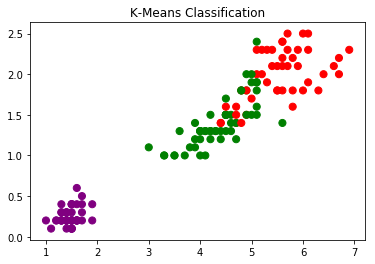

In [19]:
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width, c=color_theme[K_means_cluster.labels_], s=50)
plt.title('K-Means Classification')